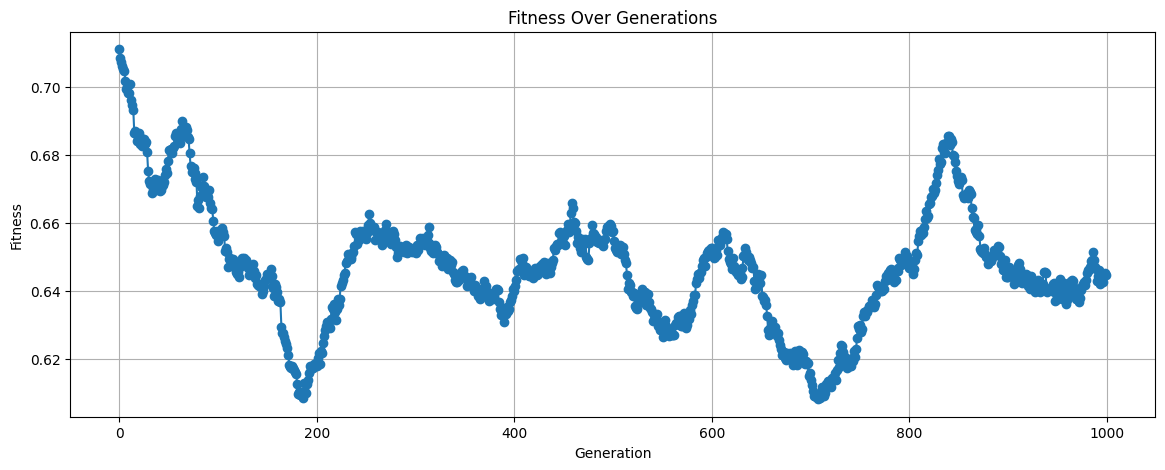

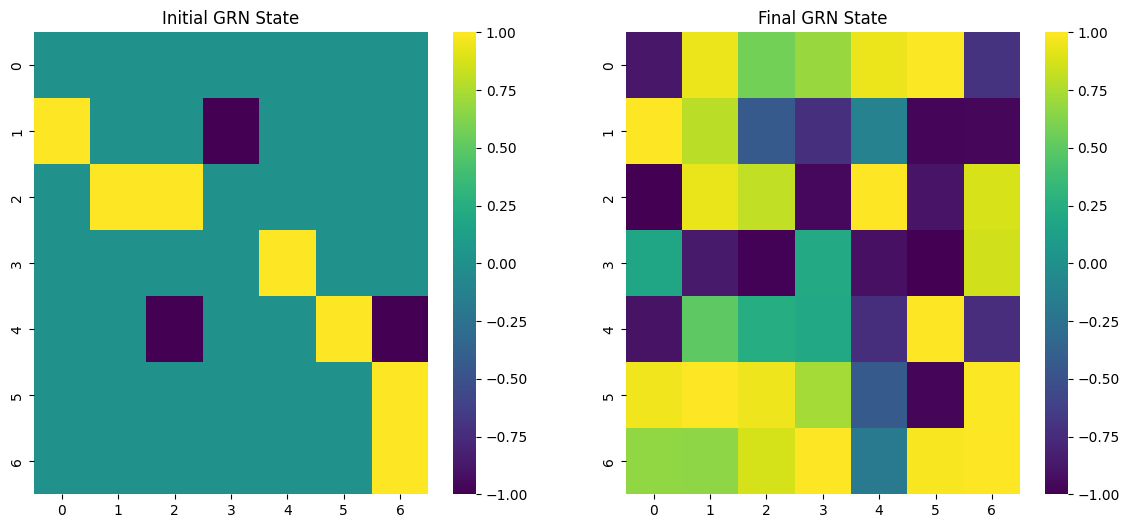

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_generations = 1000
delta_t = 0.01
feedback_strength = 0.01

# Init empty GRN with no interactions
gene_count, substrate_count = 7, 6
GRN = np.zeros((gene_count, gene_count))

activation_relationships = {
    (2, 1): 1,
    (3, 2): 1,
    (3, 3): 1,  # self-act
    (4, 5): 1,
    (5, 6): 1,
    (6, 7): 1,
    (7, 7): 1   # self-act
}

inhibition_relationships = {
    (2, 4): -1,
    (5, 3): -1,
    (5, 7): -1
}


# init
metabolic_network = np.zeros((substrate_count, substrate_count))

# Substrate to substrate
metabolic_reactions = {
    (1, 3): 1,
    (2, 3): 1,
    (3, 4): 1,
    (4, 5): 1,
    (5, 6): 1,
    (6, 4): 1,
    (6, 3): 1
}

# Update the metabolic network based on reactions
for (source, target), value in metabolic_reactions.items():
    metabolic_network[source - 1, target - 1] = value  # Subtracting 1 for zero-based indexing

# Update for bi-directional exchange with the env
def simulate_environmental_changes_bi(concentrations, change_factor=0.02, env_interaction_indices=[0, 1, 5]):
    environmental_impact = np.random.uniform(-change_factor, change_factor, concentrations.shape)
    # bi-directional exchange with the environment
    for index in env_interaction_indices:
        environmental_impact[index] += np.random.uniform(-change_factor, change_factor)
    # environmental impact (bounded)
    new_concentrations = np.clip(concentrations + environmental_impact, 0, 1)
    return new_concentrations


# Update the GRN w/ act/inh relationships
for (activator, target), value in activation_relationships.items():
    GRN[activator - 1, target - 1] = value  # Subtracting 1 for zero-based indexing

for (inhibitor, target), value in inhibition_relationships.items():
    GRN[inhibitor - 1, target - 1] = value  # Subtracting 1 for zero-based indexing

metabolic_network = np.random.uniform(-1, 1, (gene_count, substrate_count))

# Initialize signal transduction components as a binary vector
signal_transduction = np.random.choice([0, 1], size=5)

# Initialize gene expression levels and substrate concentrations with random values between 0 and 1
gene_expression_levels = np.random.rand(gene_count)
substrate_concentrations = np.random.rand(substrate_count)

# Define the environmental changes simulation function
def simulate_environmental_changes(concentrations, change_factor=0.02):
    """Simulates environmental changes by randomly altering concentrations."""
    return np.clip(concentrations + np.random.uniform(-change_factor, change_factor, concentrations.shape), 0, 1)

# Define the mutation functions for the GRN, metabolic network, and signal transduction components
def mutate(network, mutation_rate=0.05):
    """Applies mutations to a network by adding small random changes."""
    return np.clip(network + np.random.normal(0, mutation_rate, network.shape), -1, 1)

def mutate_signal_transduction(pathway, mutation_probability=0.1):
    """Randomly toggles elements in the signal transduction pathway."""
    for i in range(len(pathway)):
        if np.random.rand() < mutation_probability:
            pathway[i] = 1 - pathway[i]
    return pathway

def fitness_function(expression_levels, concentrations):
    """Calculates fitness based on expression and concentration homeostasis."""
    return (1.0 - np.mean(np.abs(expression_levels - 0.5)) + 1.0 - np.mean(np.abs(concentrations - 0.5))) / 2

# Feedback from substrates to genes
def feedback_to_GRN(substrate_concentrations, GRN, feedback_strength):
    average_metabolite_effect = np.mean(substrate_concentrations)
    feedback_effect = GRN * average_metabolite_effect * feedback_strength
    new_GRN = GRN + feedback_effect
    new_GRN = np.clip(new_GRN, -1, 1)
    return new_GRN

# Simulate the metabolic network dynamics
def simulate_metabolic_dynamics(substrate_concentrations, gene_expression_levels, metabolic_network, delta_t):
    delta_substrate_concentrations = np.zeros_like(substrate_concentrations)
    for i in range(len(substrate_concentrations)):
        gene_influence = np.dot(metabolic_network[:, i], gene_expression_levels)
        delta_substrate_concentrations[i] += gene_influence * delta_t
    new_substrate_concentrations = substrate_concentrations + delta_substrate_concentrations
    new_substrate_concentrations = np.clip(new_substrate_concentrations, 0, None)
    return new_substrate_concentrations



fitness_over_time = np.zeros(num_generations)
GRN_states = [GRN.copy()]

for generation in range(num_generations):
    substrate_concentrations = simulate_environmental_changes(substrate_concentrations)
    substrate_concentrations = simulate_metabolic_dynamics(substrate_concentrations, gene_expression_levels, metabolic_network, delta_t)
    GRN = feedback_to_GRN(substrate_concentrations, GRN, feedback_strength)
    GRN = mutate(GRN)
    metabolic_network = mutate(metabolic_network)
    signal_transduction = mutate_signal_transduction(signal_transduction)
    fitness = fitness_function(gene_expression_levels, substrate_concentrations)
    fitness_over_time[generation] = fitness

    GRN_states.append(GRN.copy())

# Fitness Viz
plt.figure(figsize=(14, 5))
plt.plot(fitness_over_time, marker='o')
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()

# init/final GRN states Viz
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(GRN_states[0], cmap='viridis', cbar=True)
plt.title('Initial GRN State')
plt.subplot(1, 2, 2)
sns.heatmap(GRN_states[-1], cmap='viridis', cbar=True)
plt.title('Final GRN State')
plt.show()


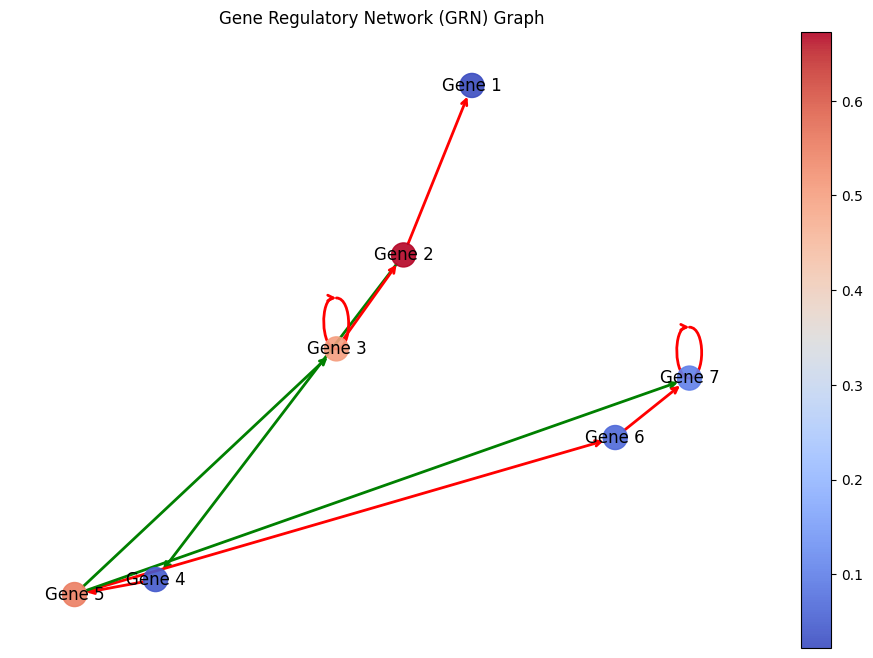

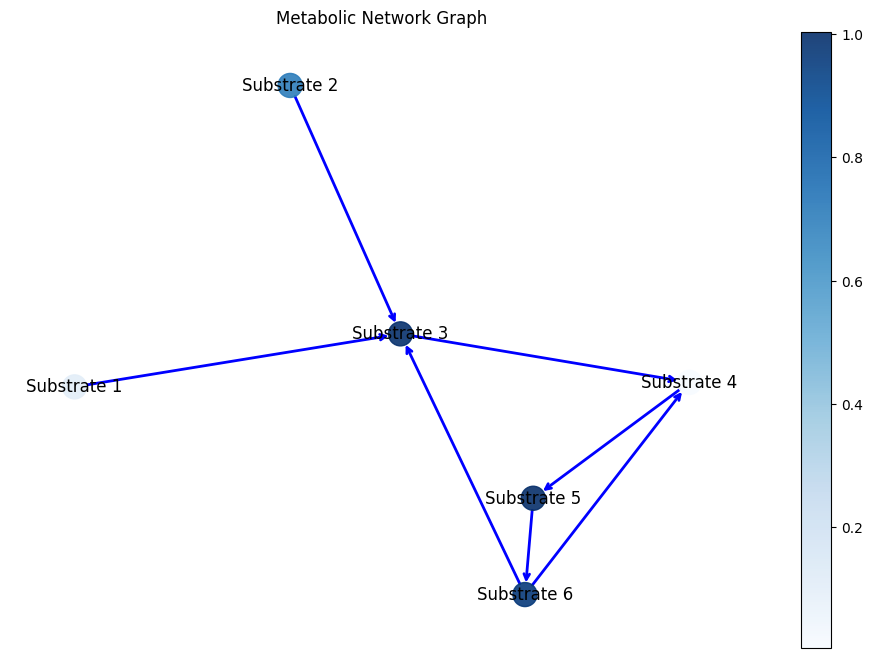

In [16]:
import networkx as nx

GRN = np.zeros((gene_count, gene_count))

activation_relationships = {
    (2, 1): 1,
    (3, 2): 1,
    (3, 3): 1,  # self-act
    (4, 5): 1,
    (5, 6): 1,
    (6, 7): 1,
    (7, 7): 1   # self-act
}

inhibition_relationships = {
    (2, 4): -1,
    (5, 3): -1,
    (5, 7): -1
}

# Update the GRN with act/inh relationships
for (source, target), interaction in activation_relationships.items():
    GRN[source - 1, target - 1] = interaction
for (source, target), interaction in inhibition_relationships.items():
    GRN[source - 1, target - 1] = interaction

metabolic_network = np.zeros((substrate_count, substrate_count))

# Substrate to substrate metabolic reactions
metabolic_reactions = {
    (1, 3): 1,
    (2, 3): 1,
    (3, 4): 1,
    (4, 5): 1,
    (5, 6): 1,
    (6, 4): 1,
    (6, 3): 1
}

# Update the metabolic network with reactions
for (source, target), interaction in metabolic_reactions.items():
    metabolic_network[source - 1, target - 1] = interaction

# Create the GRN graph
GRN_graph = nx.DiGraph()
for i in range(gene_count):
    GRN_graph.add_node(f"Gene {i+1}", expression=gene_expression_levels[i])
    for j in range(gene_count):
        if GRN[i, j] != 0:  # Only non-zero interactions
            GRN_graph.add_edge(f"Gene {i+1}", f"Gene {j+1}", weight=GRN[i, j])

# Metabolic Network graph
metabolic_graph = nx.DiGraph()
for i in range(substrate_count):
    metabolic_graph.add_node(f"Substrate {i+1}", concentration=substrate_concentrations[i])
    for j in range(substrate_count):
        if metabolic_network[i, j] != 0:  # Only non-zero interactions
            metabolic_graph.add_edge(f"Substrate {i+1}", f"Substrate {j+1}", weight=metabolic_network[i, j])

# GRN Viz
pos_GRN = nx.spring_layout(GRN_graph)
plt.figure(figsize=(12, 8))
node_color_GRN = [GRN_graph.nodes[node]['expression'] for node in GRN_graph.nodes]
nodes_GRN = nx.draw_networkx_nodes(GRN_graph, pos_GRN, node_color=node_color_GRN, cmap=plt.cm.coolwarm, alpha=0.9)
edges_GRN = GRN_graph.edges()
weights_GRN = [GRN_graph[u][v]['weight'] for u, v in edges_GRN]
edge_colors_GRN = ['red' if weight > 0 else 'green' for weight in weights_GRN]
nx.draw_networkx_edges(GRN_graph, pos_GRN, arrowstyle='->', arrowsize=10, edge_color=edge_colors_GRN, width=2)
nx.draw_networkx_labels(GRN_graph, pos_GRN)
plt.colorbar(nodes_GRN)
plt.title('Gene Regulatory Network (GRN) Graph')
plt.axis('off')
plt.show()

# Metabolic Network Viz
pos_metabolic = nx.spring_layout(metabolic_graph)
plt.figure(figsize=(12, 8))
node_color_metabolic = [metabolic_graph.nodes[node]['concentration'] for node in metabolic_graph.nodes]
nodes_metabolic = nx.draw_networkx_nodes(metabolic_graph, pos_metabolic, node_color=node_color_metabolic, cmap=plt.cm.Blues, alpha=0.9)
edges_metabolic = metabolic_graph.edges()
weights_metabolic = [metabolic_graph[u][v]['weight'] for u, v in edges_metabolic]
edge_colors_metabolic = ['blue' if weight > 0 else 'orange' for weight in weights_metabolic]
nx.draw_networkx_edges(metabolic_graph, pos_metabolic, arrowstyle='->', arrowsize=10, edge_color=edge_colors_metabolic, width=2)
nx.draw_networkx_labels(metabolic_graph, pos_metabolic)
plt.colorbar(nodes_metabolic)
plt.title('Metabolic Network Graph')
plt.axis('off')
plt.show()